In [1]:
!pip install ipython-autotime

In [2]:
%load_ext autotime

time: 256 µs (started: 2021-03-29 09:26:21 +02:00)


In [3]:
import torch         
import torchvision
import torchvision.transforms as transforms

time: 889 ms (started: 2021-03-29 09:26:22 +02:00)


### Check if GPU is present

In [4]:
#device = 'cuda' if torch.cuda.is_available() else 'cpu'
if (torch.cuda.is_available()):
    cuda = torch.device('cuda')

time: 52.6 ms (started: 2021-03-29 09:26:25 +02:00)


In [5]:
trainset = torchvision.datasets.CIFAR10(train = True, target_transform = transforms.ToTensor(),root="cifar-10", download = True)

Files already downloaded and verified
time: 772 ms (started: 2021-03-29 09:26:26 +02:00)


In [6]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar-10
    Split: Train
    StandardTransform
Target transform: ToTensor()

time: 12.4 ms (started: 2021-03-29 09:26:28 +02:00)


In [7]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=32,shuffle=True,num_workers=2)

time: 724 µs (started: 2021-03-29 09:26:29 +02:00)


In [8]:
testset = torchvision.datasets.CIFAR10(train = False, target_transform = transforms.ToTensor(),root="cifar-10-test", download = True)

Files already downloaded and verified
time: 660 ms (started: 2021-03-29 09:26:29 +02:00)


In [9]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: cifar-10-test
    Split: Test
    StandardTransform
Target transform: ToTensor()

time: 1.33 ms (started: 2021-03-29 09:26:30 +02:00)


In [10]:
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

time: 739 µs (started: 2021-03-29 09:26:31 +02:00)


In [11]:
labels = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

time: 623 µs (started: 2021-03-29 09:26:31 +02:00)


In [12]:
torch.cuda.current_device()

0

time: 20.2 ms (started: 2021-03-29 09:26:32 +02:00)


In [13]:
torch.cuda.get_device_name(0)

'GeForce GTX 1060 6GB'

time: 3.11 ms (started: 2021-03-29 09:26:33 +02:00)


In [14]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
time: 1.28 s (started: 2021-03-29 09:26:35 +02:00)


### Preview CIFAR-10 dataset images

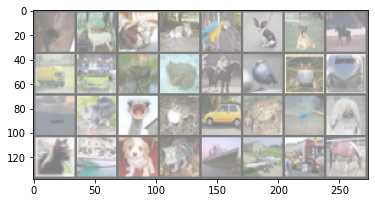

  cat  deer   cat   cat  bird   dog   dog horse truck   car  deer  frog horse  bird  frog plane  ship   cat  bird  frog   car  frog  bird   dog horse  ship   dog   cat  ship plane truck horse
time: 482 ms (started: 2021-03-29 09:27:19 +02:00)


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
print(dataiter)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(32)))

## Check if GPU is present - if yes computer on GPU else on CPU

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

time: 3.28 ms (started: 2021-03-29 09:27:24 +02:00)


### Setting up the layers of Convolutional neural network

In [19]:
in_size = 3                 # number of channel in the input image
 
hid1_size = 64              # no of output channel from first CNN layer

hid2_size = 128              # no of output channel from second CNN layer

hid3_size = 256

hid4_size = 512

out_size = len(labels)      # no of categories in the dataset
#set_trace()
k_conv_size = 3             # 3x3 convolutional kernel
conv_stride = 1
conv_pad = 1

time: 1.26 ms (started: 2021-03-29 09:29:47 +02:00)


In [34]:
import torch.nn as nn

class VGG_11(nn.Module):
    
    def __init__(self):
        super(VGG_11,self).__init__()
        
        self.convLayer = nn.Sequential(
            nn.Conv2d(in_size, hid1_size, k_conv_size, stride=conv_stride, padding=conv_pad),    # conv layer
            nn.BatchNorm2d(hid1_size),
            #nn.LocalResponseNorm(64),
            nn.ReLU(),                              # Activation layer
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(hid1_size,hid2_size,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.BatchNorm2d(hid2_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(hid2_size,hid3_size,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.BatchNorm2d(hid3_size),
            nn.ReLU(),
            nn.Conv2d(hid3_size,hid3_size,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.BatchNorm2d(hid3_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(hid3_size,hid4_size,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.BatchNorm2d(hid4_size),
            nn.ReLU(),
            nn.Conv2d(hid4_size,hid4_size,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.BatchNorm2d(hid4_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(hid4_size,hid4_size,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.BatchNorm2d(hid4_size),
            nn.ReLU(),
            nn.Conv2d(hid4_size,hid4_size,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.BatchNorm2d(hid4_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )  # Pooling layer with kernel size 2x2
        
     
        self.fullyConnLayer = nn.Sequential(
        nn.Linear(512, out_size),
        nn.Softmax(dim=1)
        #nn.ReLU(),
        #nn.Dropout(p=0.5),
        #nn.Linear(4096,4096),
        #nn.ReLU(),
        #nn.Dropout(p=0.5),
        #nn.Linear(4096,out_size)
        )
            
        
    def forward(self,x):
            #out = self.layer1(x)
            
            out = self.convLayer(x)
            
            out = out.reshape(out.size(0), -1)
            
            out = self.fullyConnLayer(out)
            
            return out 
        
vgg_11 = VGG_11()

time: 52.8 ms (started: 2021-03-29 10:37:44 +02:00)


## Define a Loss function and optimizer

In [35]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adadelta(vgg_11.parameters())

time: 1.41 ms (started: 2021-03-29 10:37:46 +02:00)


In [36]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda
time: 820 µs (started: 2021-03-29 10:37:47 +02:00)


## Train the network

In [37]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = vgg_11(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        # print statistics        
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 3.356
[1,   400] loss: 3.313
[1,   600] loss: 3.303
[1,   800] loss: 3.283
[1,  1000] loss: 3.325
[1,  1200] loss: 3.296
[1,  1400] loss: 3.289
[2,   200] loss: 3.266
[2,   400] loss: 3.246
[2,   600] loss: 3.230
[2,   800] loss: 3.237
[2,  1000] loss: 3.230
[2,  1200] loss: 3.218
[2,  1400] loss: 3.210
[3,   200] loss: 3.199
[3,   400] loss: 3.191
[3,   600] loss: 3.189
[3,   800] loss: 3.201
[3,  1000] loss: 3.196
[3,  1200] loss: 3.198
[3,  1400] loss: 3.191
[4,   200] loss: 3.168
[4,   400] loss: 3.173
[4,   600] loss: 3.161
[4,   800] loss: 3.132
[4,  1000] loss: 3.158
[4,  1200] loss: 3.145
[4,  1400] loss: 3.128
[5,   200] loss: 3.132
[5,   400] loss: 3.109
[5,   600] loss: 3.133
[5,   800] loss: 3.124
[5,  1000] loss: 3.110
[5,  1200] loss: 3.113
[5,  1400] loss: 3.097
Finished Training
time: 43min 4s (started: 2021-03-29 10:38:45 +02:00)


### Save the trained model

In [25]:
PATH = './cifar_vgg11_4_with_batchNorm__no_softmax_5ep_GPU_1FCL_with_softmax.pth'
torch.save(vgg_11.state_dict(), PATH)

time: 61.3 ms (started: 2021-03-29 10:18:16 +02:00)


## Test the network on the test data

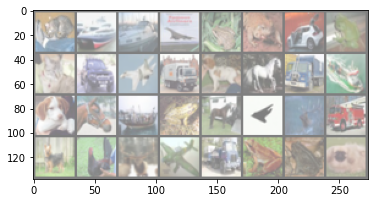

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane truck  frog  frog   dog
time: 181 ms (started: 2021-03-29 10:33:40 +02:00)


In [27]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(32)))

In [28]:
outputs = vgg_11(images)

time: 129 ms (started: 2021-03-29 10:33:43 +02:00)


In [29]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(32)))

Predicted:    cat  ship plane plane  frog   dog   car  deer   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane plane truck  deer  bird   cat plane truck  frog   cat   dog
time: 16.2 ms (started: 2021-03-29 10:33:45 +02:00)


### Accuracy on whole test-dataset

In [30]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = vgg_11(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 77 %
time: 26.1 s (started: 2021-03-29 10:33:46 +02:00)


### Which classes perform well and which classes did not?

In [31]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = vgg_11(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 80 %
Accuracy of   car : 90 %
Accuracy of  bird : 55 %
Accuracy of   cat : 61 %
Accuracy of  deer : 79 %
Accuracy of   dog : 74 %
Accuracy of  frog : 80 %
Accuracy of horse : 74 %
Accuracy of  ship : 86 %
Accuracy of truck : 91 %
time: 26.2 s (started: 2021-03-29 10:35:04 +02:00)


### Test the default CUDA device

In [32]:
torch.cuda.current_device()

0

time: 3.23 ms (started: 2021-03-29 10:36:39 +02:00)


In [33]:
torch.cuda.get_device_name(0)

'GeForce GTX 1060 6GB'

time: 2.06 ms (started: 2021-03-29 10:36:41 +02:00)


# End

## Test code

In [ ]:
if __name__ == '__main__':
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    #model = vgg_11(testloader).to(device)
    for data in testloader:
        images, labels = data
        model = vgg_11(images)
        print(model)

## Define a Convolutional Neural Network - Approach 2

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

in_size = 3                 # number of channel in the input image
 
hid1_size = 64              # no of output channel from first CNN layer

hid2_size = 128              # no of output channel from second CNN layer

out_size = len(labels)      # no of categories in the dataset

k_conv_size = 3             # 3x3 convolutional kernel

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()